In [9]:
from google.colab import drive
drive.mount('/content/drive')
import os
current_directory = os.getcwd()
print(current_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load the data
data = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/data/full_parameter/edited.csv')

# Preprocessing function
def preprocess_data(data):
    date_time = pd.to_datetime(data['time'], format = 'ISO8601')
    data.set_index(date_time, inplace=True)
    data.drop(['time'], axis=1, inplace=True)
    return data

data = preprocess_data(data)
features =   ['temperature_2m (°C)',
             'relative_humidity_2m (%)',
             'apparent_temperature (°C)',
             'rain (mm)',
             'surface_pressure (hPa)',
             'cloud_cover (%)',
             'cloud_cover_low (%)',
             'cloud_cover_mid (%)',
             'cloud_cover_high (%)',
             'wind_speed_10m (km/h)',
             'wind_speed_100m (km/h)',
             'wind_direction_10m (°)',
             'wind_direction_100m (°)']
target = 'rain (mm)'

data = data.dropna() # Handle missing values if any
data.head()

,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
time,,,,,,,,,,,,,
2001-01-01 00:00:00,22.0,93.0,25.5,0.0,1006.6,41.0,25.0,28.0,4.0,4.6,11.1,141.0,126.0
2001-01-01 01:00:00,21.9,93.0,25.3,0.0,1006.7,25.0,8.0,29.0,0.0,5.1,9.7,129.0,121.0
2001-01-01 02:00:00,23.1,87.0,26.8,0.0,1006.2,38.0,14.0,42.0,0.0,3.6,7.5,96.0,107.0
2001-01-01 03:00:00,22.4,92.0,26.3,0.0,1005.5,38.0,20.0,33.0,0.0,2.9,6.5,60.0,90.0
2001-01-01 04:00:00,21.9,94.0,25.8,0.0,1005.7,52.0,30.0,41.0,0.0,3.1,6.2,45.0,80.0


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),207872.0,26.908016,2.897599,16.4,24.8,26.3,28.8,38.7
surface_pressure (hPa),207872.0,1005.522281,2.345127,995.4,1003.9,1005.4,1007.1,1016.6
relative_humidity_2m (%),207872.0,79.425704,15.313712,21.0,70.0,83.0,92.0,100.0
rain (mm),207872.0,0.230354,0.844700,0.0,0.0,0.0,0.1,53.4
surface_pressure (hPa),207872.0,1005.522281,2.345127,995.4,1003.9,1005.4,1007.1,1016.6
cloud_cover (%),207872.0,44.532914,27.242284,0.0,26.0,40.0,62.0,100.0
cloud_cover_low (%),207872.0,14.595285,20.108979,0.0,1.0,7.0,19.0,100.0
cloud_cover_mid (%),207872.0,21.982773,25.976349,0.0,3.0,13.0,30.0,100.0
cloud_cover_high (%),207872.0,65.021706,38.296292,0.0,28.0,85.0,98.0,100.0
wind_speed_10m (km/h),207872.0,7.710011,4.032094,0.0,4.7,6.9,10.3,36.4


In [3]:
data['rain (mm)'] = np.log1p(data['rain (mm)']) # Log transform the precipitation

# Split data into features and target
X = data[features].values
y = data[target].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Feature selection with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                      Feature    Importance
3                   rain (mm)  9.999954e-01
2   apparent_temperature (°C)  2.621336e-06
0         temperature_2m (°C)  7.720096e-07
4      surface_pressure (hPa)  5.030435e-07
6         cloud_cover_low (%)  2.447809e-07
9       wind_speed_10m (km/h)  1.274585e-07
7         cloud_cover_mid (%)  1.025281e-07
12    wind_direction_100m (°)  7.311844e-08
10     wind_speed_100m (km/h)  6.125177e-08
5             cloud_cover (%)  5.664380e-08
11     wind_direction_10m (°)  4.964497e-08
1    relative_humidity_2m (%)  3.367812e-08
8        cloud_cover_high (%)  2.389483e-09


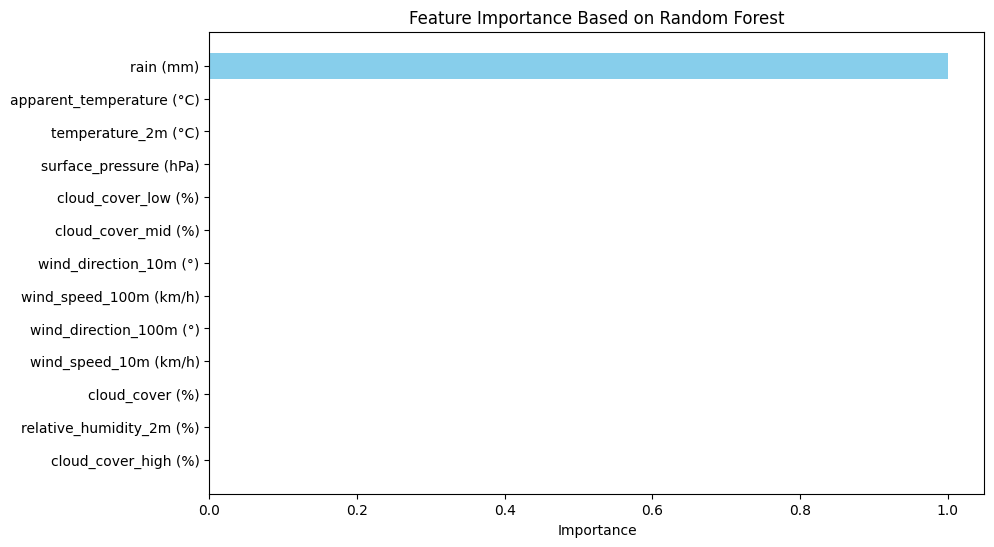

In [ ]:
import matplotlib.pyplot as plt
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [ ]:
  # Select the top N features (for example, top 3)
top_features = feature_importance['Feature'][:3].values
top_feature_indices = [list(features).index(f) for f in top_features]
print(top_feature_indices)

[3, 2, 0]


In [4]:
top_feature_indices = [3, 2, 0]
X_selected = X_scaled[:, top_feature_indices]

# Create sequences
def create_sequences(X, y, time_steps):
    sequences = []
    labels = []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:(i + time_steps)])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

time_steps = 24
X_seq, y_seq = create_sequences(X_selected, y, time_steps)

In [5]:
# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_test, y_test = X_seq[train_size:], y_seq[train_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (166297, 24, 3), y_train shape: (166297,)
X_test shape: (41551, 24, 3), y_test shape: (41551,)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(time_steps, X_selected.shape[1])))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(1, activation='relu'))  # Ensuring non-negative predictions with ReLU
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 128)             │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,057 (457.25 KB)

 Trainable params: 117,057 (457.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
# Train the model with checkpoints
model = load_model('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/precipitation_model.keras')
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
checkpoint_path = "/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/precipitation_model.keras"
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_weights_only=False, save_freq='epoch')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping, checkpoint])

Epoch 1/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0402 - val_loss: 0.0626
Epoch 2/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0395 - val_loss: 0.0619
Epoch 3/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0392 - val_loss: 0.0619
Epoch 4/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0390 - val_loss: 0.0627
Epoch 5/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0393 - val_loss: 0.0615
Epoch 6/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0382 - val_loss: 0.0637
Epoch 7/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0377 - val_loss: 0.0618
Epoch 8/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 0.0374 - val_loss: 0.0627
Epoch 9/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0369 - val_loss: 0.0644
Epoch 10/10
2274/2274 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0367 - val_loss: 0.0624


In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.125, callbacks=[early_stopping, checkpoint])

Epoch 1/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0362 - val_loss: 0.0611
Epoch 2/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0351 - val_loss: 0.0621
Epoch 3/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0345 - val_loss: 0.0630
Epoch 4/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0329 - val_loss: 0.0625
Epoch 5/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0325 - val_loss: 0.0646
Epoch 6/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0318 - val_loss: 0.0654
Epoch 7/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 0.0313 - val_loss: 0.0659
Epoch 8/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0314 - val_loss: 0.0674
Epoch 9/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0292 - val_loss: 0.0676
Epoch 10/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 0.0286 - val_loss: 0.0677
Epoch 11/100
4548/4548 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0281 - val_loss: 0.0693
Epoch 12

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)



1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [26]:
# Inverse log transform the predictions and true values
y_pred_inverse = np.expm1(y_pred)
y_test_inverse = np.expm1(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.9481229269114676
Mean Absolute Error (MAE): 0.27269884759528124
R-squared: 0.23513573925338704


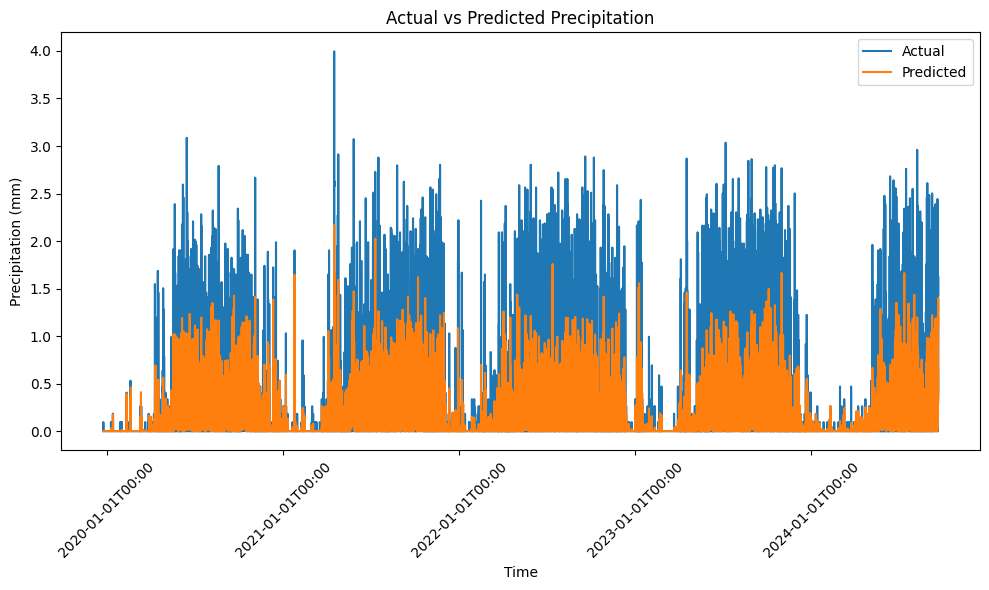

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/data/full_parameter/edited.csv')

date_time = pd.to_datetime(data['time'], format = 'ISO8601')
time_test = date_time[train_size + time_steps + 40:]

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(time_test, y_test_inverse, label='Actual')
plt.plot(time_test, y_pred_inverse, label='Predicted')

# Formatting the x-axis to show ISO8601 time format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%dT%H:%M'))

plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Application**

In [ ]:
from tensorflow.keras.models import load_model
# Load the data
data_app = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/data/application/application.csv')

time_app = pd.to_datetime(data_app['time'], format = 'ISO8601')
time_list = data_app['time'].astype('str').tolist()
data_app.set_index(time_app, inplace=True)
# Drop unnecessary columns
data_app = data_app.drop(['time'], axis=1)

features = ['temperature_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)']
target = 'precipitation (mm)'

data_app['precipitation (mm)'] = np.log1p(data_app['precipitation (mm)'])

scaler = StandardScaler()
scaled_app = scaler.fit_transform(data_app[features].values)

X_app, y_app = create_sequences(scaled_app, data_app[target].values, 24)

model = load_model('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/precipitation_model.keras')
y_pred_app = model.predict(X_app)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_app_inverse = np.expm1(y_pred_app)
y_app_inverse = np.expm1(y_app)

# Calculate metrics
mse = mean_squared_error(y_app_inverse, y_pred_app_inverse)
mae = mean_absolute_error(y_app_inverse, y_pred_app_inverse)
r2 = r2_score(y_app_inverse, y_pred_app_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.1390094101338419
Mean Absolute Error (MAE): 0.21474123699590564
R-squared: 0.0


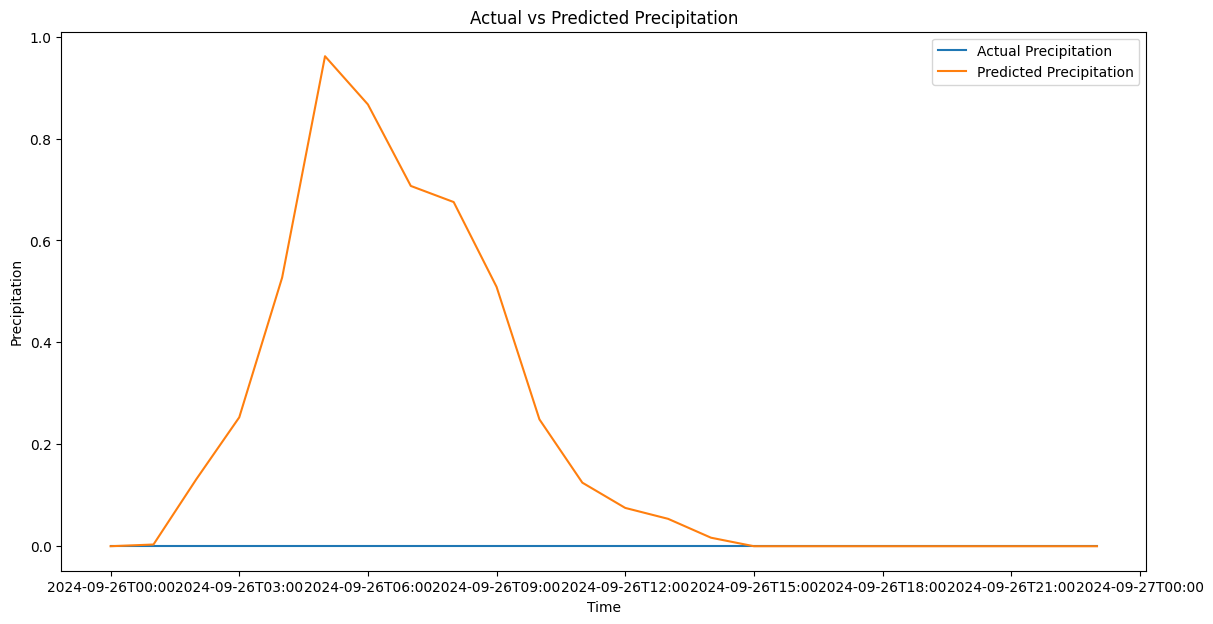

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(time_app[24:],y_app_inverse, label='Predicted Precipitation')
# plt.plot(time_app[24:],y_pred_app_inverse, label='Predicted Precipitation')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%dT%H:%M'))
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()

**Demo**

In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
# Load the data
data_app = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/test.csv')

# Create sequences
def create_sequences(X, y, time_steps):
    sequences = []
    labels = []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:(i + time_steps)])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

time_app = pd.to_datetime(data_app['time'], format = 'ISO8601')
time_list = data_app['time'].astype('str').tolist()
data_app.set_index(time_app, inplace=True)
# Drop unnecessary columns
data_app = data_app.drop(['time'], axis=1)

features = ['temperature_2m (°C)', 'apparent_temperature (°C)', 'rain (mm)']
target = 'rain (mm)'

data_app['rain (mm)'] = np.log1p(data_app['rain (mm)'])

scaler = StandardScaler()
scaled_app = scaler.fit_transform(data_app[features].values)

X_app, y_app = create_sequences(scaled_app, data_app[target].values, 24)

model = load_model('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/precipitation_model.keras')
y_pred_app = model.predict(X_app)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


In [ ]:
y_pred_app_inverse = np.expm1(y_pred_app)
y_app_inverse = np.expm1(y_app)

# Calculate metrics
mse = mean_squared_error(y_app_inverse, y_pred_app_inverse)
mae = mean_absolute_error(y_app_inverse, y_pred_app_inverse)
r2 = r2_score(y_app_inverse, y_pred_app_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.1390094101338419
Mean Absolute Error (MAE): 0.21474123699590564
R-squared: 0.0


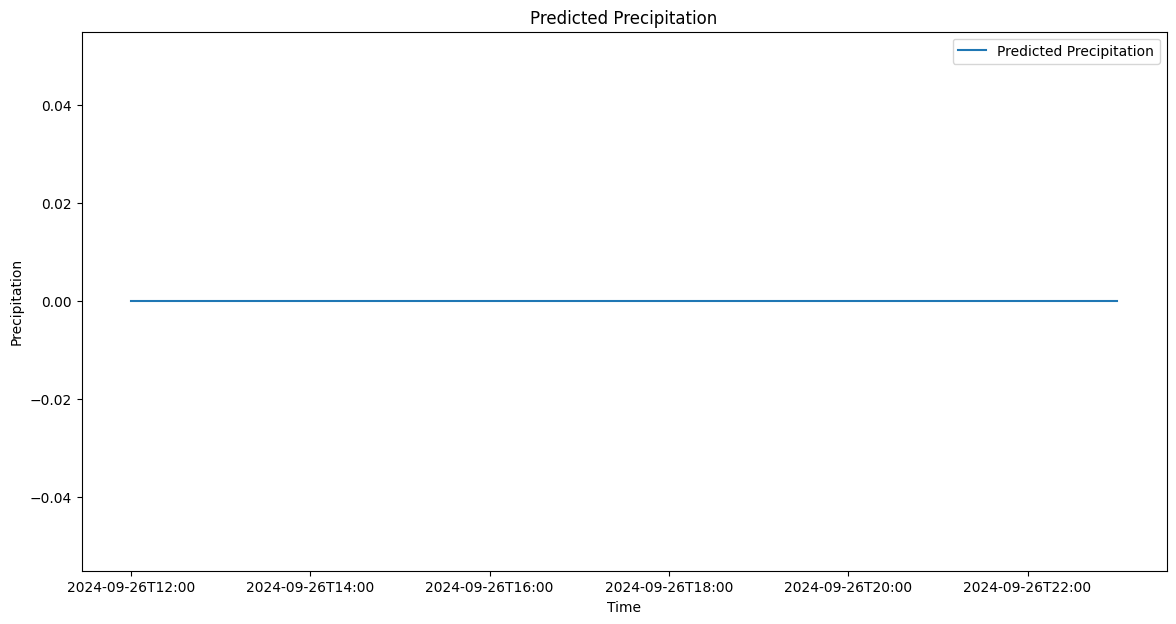

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(time_app[36:],y_app_inverse[12:], label='Predicted Precipitation')
# plt.plot(time_app[24:],y_pred_app_inverse, label='Predicted Precipitation')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%dT%H:%M'))
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Predicted Precipitation')
plt.legend()3
plt.show()